# Preprocessing

In [14]:
import pandas as pd

def load_file(name):
    #load excel file
    df = pd.read_excel(name)

    #clean unwanted unicode characters from all string columns
    def clean_unicode(df):
        for col in df.select_dtypes(include=['object']).columns:
            df[col] = (
                df[col]
                .str.replace('\u202a', '', regex=True)
                .str.replace('\u202c', '', regex=True)
                .str.strip()
            )
        return df

    df = clean_unicode(df)

    #convert y/n to t/f
    for col in df.select_dtypes(include=['object']).columns:
        if set(df[col].dropna().unique()) == {'Yes', 'No'}:
            df[col] = df[col].apply(lambda x: True if x == 'Yes' else False)

    #convert t/f to 1/0
    for col in df.select_dtypes(include=['bool']).columns:
        df[col] = df[col].astype(int)

    #convert male/female to 1/0
    for col in df.select_dtypes(include=['object']).columns:
        if set(df[col].dropna().unique()).issubset({'Male', 'Female'}):
            df[col] = df[col].map({'Male': 1, 'Female': 0})

    return df


UPLOADING THE DATA

In [15]:
#excel files have been uploaded


In [16]:
demo_df = load_file('Demographics.xlsx')
demo_df.head()
# columns:
# Row Id,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents

,Row Id,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,1,8779-QRDMV,1,1,78,0,1,0,0,0
1,2,7495-OOKFY,1,0,74,0,1,1,1,1
2,3,1658-BYGOY,1,1,71,0,1,0,1,3
3,4,4598-XLKNJ,1,0,78,0,1,1,1,1
4,5,4846-WHAFZ,1,0,80,0,1,1,1,1


In [17]:
serv_df = load_file('Services.xlsx')
serv_df.head()
# columns:
# Row Id, Service ID, Customer ID, Count, Quarter, Referred a Friend, Number of Referrals,
#Tenure in Months, Offer, Phone Service, Avg Monthly Long Distance Charges,
#Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Online Security,
#Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract,
#Paperless Billing, Payment Method, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue.

,Row Id,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1,IJKDQVSWH3522,8779-QRDMV,1,Q3,0,0,1,None,0,...,0,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,2,BFKMZJAIE2285,7495-OOKFY,1,Q3,1,1,8,Offer E,1,...,1,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,3,EIMVJQBMT7187,1658-BYGOY,1,Q3,0,0,18,Offer D,1,...,1,Month-to-Month,1,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4,EROZQXDUU4979,4598-XLKNJ,1,Q3,1,1,25,Offer C,1,...,1,Month-to-Month,1,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,5,GEEYSJUHY6991,4846-WHAFZ,1,Q3,1,1,37,Offer C,1,...,1,Month-to-Month,1,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [18]:
status_df = load_file('Status.xlsx')
status_df['Customer Status'] = status_df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)
status_df.head()
# status_df.head()# columns:
# Row Id, Status ID, Customer ID, Count, Quarter, Satisfaction Score, Satisfaction Score Label, Customer Status, Churn Label, Churn Value, Churn Score, Churn Score Category, CLTV, CLTV Category, Churn Category, Churn Reason.

,Row Id,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Satisfaction Score Label,Customer Status,Churn Label,Churn Value,Churn Score,Churn Score Category,CLTV,CLTV Category,Churn Category,Churn Reason
0,1,SWSORB1252,8779-QRDMV,1,Q3,3,3,1,1,1,91,91-100,5433,5001-5500,Competitor,Competitor offered more data
1,2,SNAEQA8572,7495-OOKFY,1,Q3,3,3,1,1,1,69,61-70,5302,5001-5500,Competitor,Competitor made better offer
2,3,LMBQNN3714,1658-BYGOY,1,Q3,2,2,1,1,1,81,81-90,3179,3001-3500,Competitor,Competitor made better offer
3,4,VRZYZI9978,4598-XLKNJ,1,Q3,2,2,1,1,1,88,81-90,5337,5001-5500,Dissatisfaction,Limited range of services
4,5,FDNAKX1688,4846-WHAFZ,1,Q3,2,2,1,1,1,67,61-70,2793,2501-3000,Price,Extra data charges


In [19]:
locat_df = load_file('locations.xlsx')
locat_df.head()
# status_df.head()# columns:
# Row Id, Location ID, Customer ID, Count, Country, State, City, Zip Code, Lat Long.

,Row Id,Location ID,Customer ID,Count,Country,State,City,Zip Code,Lat Long
0,1,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"""34.02381, -118.156582"""
1,2,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"""34.044271, -118.185237"""
2,3,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"""34.108833, -118.229715"""
3,4,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"""33.936291, -118.332639"""
4,5,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"""33.972119, -118.020188"""


In [20]:
pop_df = load_file('population.xlsx')
pop_df.head()
# status_df.head()# columns:
#  Row Id, ID, Zip Code, Population.

,Row Id,ID,Zip Code,Population
0,1,1,90001,54492
1,2,2,90002,44586
2,3,3,90003,58198
3,4,4,90004,67852
4,5,5,90005,43019


In [21]:
demo = demo_df.drop(columns=['Count']).copy()
serv = serv_df.drop(columns=['Service ID', 'Count', 'Quarter', 'Offer',
                             'Contract', 'Internet Type', 'Payment Method']).copy()
status = status_df.drop(columns=['Status ID', 'Quarter', 'Churn Score Category',
                                 'CLTV Category', 'Churn Category', 'Churn Reason']).copy()

In [22]:
status_df[status_df['Count'] != 1]
#all the DFs have only values of 1 in the 'Count' column, so we can drop this column


,Row Id,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Satisfaction Score Label,Customer Status,Churn Label,Churn Value,Churn Score,Churn Score Category,CLTV,CLTV Category,Churn Category,Churn Reason


# Initial Model

In [ ]:
dfs = [demo, serv, status]
merged = dfs[0]
for df in dfs[1:]:
  merged = pd.merge(merged, df, on='Customer ID')

merged.drop(columns=['Customer ID', 'Churn Label', 'Churn Value', 'Churn Score', 'Row Id_x', 'Row Id_y', 'Row Id', 'Count'], inplace=True)
merged
#Under 30 and Senior Citizen can be described by Age

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Satisfaction Score Label,Customer Status,CLTV
0,1,78,0,1,0,0,0,0,0,1,...,39.65,39.65,0.00,20,0.00,59.65,3,3,1,5433
1,0,74,0,1,1,1,1,1,1,8,...,80.65,633.30,0.00,0,390.80,1024.10,3,3,1,5302
2,1,71,0,1,0,1,3,0,0,18,...,95.45,1752.55,45.61,0,203.94,1910.88,2,2,1,3179
3,0,78,0,1,1,1,1,1,1,25,...,98.50,2514.50,13.43,0,494.00,2995.07,2,2,1,5337
4,0,80,0,1,1,1,1,1,1,37,...,76.50,2868.15,0.00,0,234.21,3102.36,2,2,1,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,30,0,0,0,0,0,0,0,72,...,21.15,1419.40,19.31,0,1639.44,3039.53,5,5,0,5306
7039,1,38,0,0,1,1,2,1,1,24,...,84.80,1990.50,48.23,0,865.20,2807.47,3,3,0,2140
7040,0,30,0,0,1,1,2,1,4,72,...,103.20,7362.90,45.38,0,2135.52,9453.04,4,4,0,5560
7041,0,32,0,0,1,1,2,1,1,11,...,29.60,346.45,27.24,0,0.00,319.21,4,4,0,2793


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

X = merged.drop('Customer Status', axis = 1)
y = merged['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report

#convert data into dmatrix format (optimal for XGBoost)
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

#parameter grid for randomizedsearchcv
param_dist = {
    'learning_rate': uniform(loc=0, scale=0.15),
    'max_depth': [1, 2, 3],
    'n_estimators': randint(10, 200),
    'subsample': uniform(loc=0.6, scale=0.4),  #for XGBoost to improve generalization
    'colsample_bytree': uniform(loc=0.6, scale=0.4)  #optional XGBoost parameter
}

#initializing classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=0)

#initializing randomizedsearchcv with xgboost classifier
best_xgb_classifier = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist,
                                         n_iter=500, n_jobs=-1, cv=5, verbose=2, random_state=0)

best_xgb_classifier.fit(X_train, y_train)

print(f"Best n_estimators: {best_xgb_classifier.best_params_['n_estimators']}, "
      f"Best Learning Rate: {best_xgb_classifier.best_params_['learning_rate']}, "
      f"Best Accuracy: {best_xgb_classifier.best_score_}")

#train the model using the best hyperparameters found by RandomizedSearchCV
best_params = best_xgb_classifier.best_params_
params = {
    'objective': 'binary:logistic',  #binary classification
    'eval_metric': 'logloss',       #evaluation metric (log-loss for binary classification)
    'max_depth': best_params['max_depth'],
    'eta': best_params['learning_rate'],
    'subsample': best_params['subsample'],
    'colsample_bytree': best_params['colsample_bytree']
}

#train the model using the best hyperparameters
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=best_params['n_estimators'])

#predict probabilities using the trained model
y_pred_prob = xgb_model.predict(test_dmatrix)

#convert probabilities to binary predictions (0 or 1 based on threshold of 0.5)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best n_estimators: 183, Best Learning Rate: 0.11722357756641194, Best Accuracy: 0.9593542011754119
Balanced Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1036
           1       0.95      0.89      0.92       373

    accuracy                           0.96      1409
   macro avg       0.96      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409



In [ ]:
merged.dtypes

,0
Gender,int64
Age,int64
Under 30,int64
Senior Citizen,int64
Married,int64
Dependents,int64
Number of Dependents,int64
Referred a Friend,int64
Number of Referrals,int64
Tenure in Months,int64


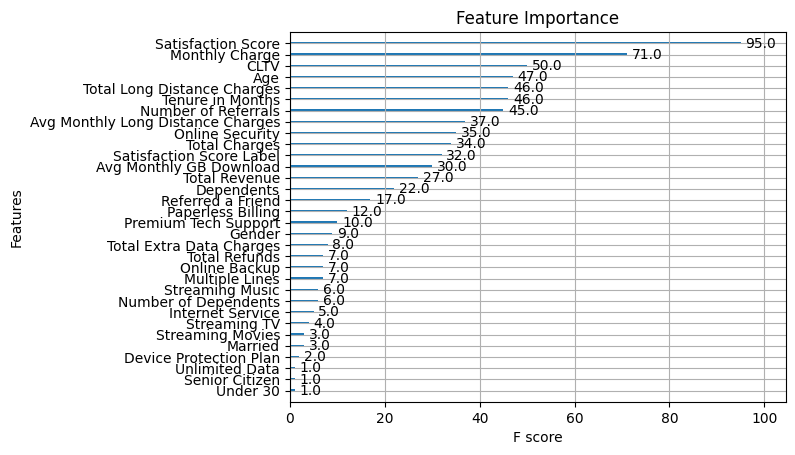

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

#extract the best xgboost model from randomizedsearchcv
best_model = best_xgb_classifier.best_estimator_

#plotting the feature importance
plot_importance(best_model)
plt.title("Feature Importance")
plt.show()


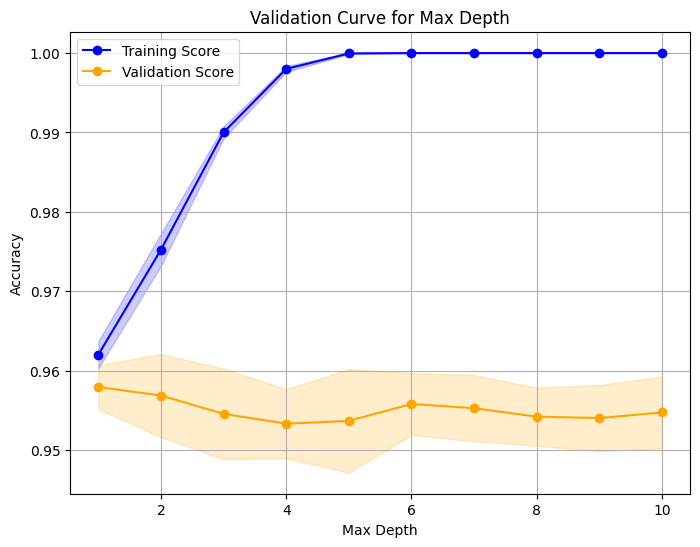

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

#validation curve for max_depth
param_range = np.arange(1, 11)
train_scores, valid_scores = validation_curve(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=0),
    X=X_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

#validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", color="blue", marker='o')
plt.plot(param_range, valid_mean, label="Validation Score", color="orange", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color="orange")
plt.title("Validation Curve for Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1020   16]
 [  46  327]]


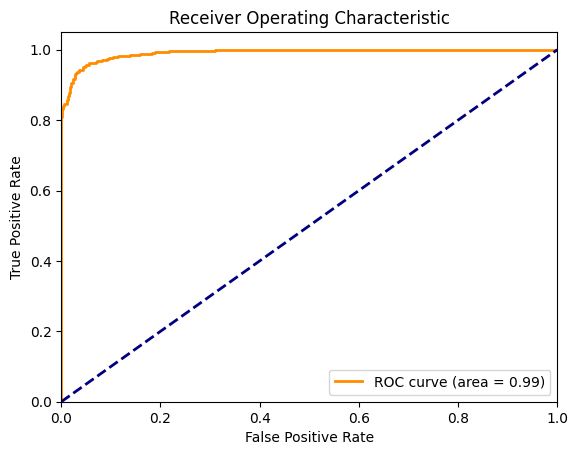

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Step 2: Feature Engineering

Goal is to improve prediction accuracy of our model

In [ ]:
#feature engineering for all pairs of service variables
import itertools
import pandas as pd
from sklearn.feature_selection import f_classif

#these are service variables
services = ['Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
            'Device Protection Plan', 'Premium Tech Support', 'Streaming Movies',
            'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Internet Service', 'Streaming TV']

#compute F-scores for individual features
F_scores, p_values = f_classif(X_train[services], y_train)
feature_F_scores = dict(zip(services, F_scores))

#generate all possible combinations of features
combinations = list(itertools.combinations(services, 2))

#binary interaction features and evaluate them
for combo in combinations:

    new_feature = ((X_train[combo[0]] > 0) & (X_train[combo[1]] > 0)).astype(int)

    #f-value of the new feature
    F_Score_new, p_value_new = f_classif(new_feature.to_frame(), y_train)

    #calculate the improvement factor
    F_score_improvement = F_Score_new[0] / max(feature_F_scores[combo[0]], feature_F_scores[combo[1]])

    #check if the new feature improves prediction accuracy
    if F_score_improvement >= 1.2 and F_Score_new[0] >= 50 and p_value_new < 0.1:
        print(f"Binary interaction feature based on {combo} has an F-score of {F_Score_new[0]:.2f}")
        print(f"\tImprovement by factor of {F_score_improvement:.2f} over individual features.")
        print(f"\tSignificant result (p = {p_value_new[0]:.4f})")


Binary interaction feature based on ('Online Backup', 'Device Protection Plan') has an F-score of 68.80
	Improvement by factor of 1.70 over individual features.
	Significant result (p = 0.0000)


In [ ]:
#feature engineering for specific bundles that are common
import itertools
import pandas as pd
from sklearn.feature_selection import f_classif


services = ['Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
            'Device Protection Plan', 'Premium Tech Support', 'Streaming Movies',
            'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Internet Service', 'Streaming TV']

#compute F-scores for individual features
F_scores, p_values = f_classif(X_train[services], y_train)
feature_F_scores = dict(zip(services, F_scores))

bundles = [
    ['Phone Service', 'Internet Service', 'Streaming TV'],
    ['Phone Service', 'Multiple Lines', 'Unlimited Data'],
    ['Device Protection Plan', 'Premium Tech Support'],
    ['Streaming Movies', 'Streaming Music'],
    ['Phone Service', 'Multiple Lines', 'Streaming Movies', 'Streaming Music', 'Premium Tech Support']
]

#binary interaction features and evaluate them
for bundle in bundles:
    #1 if all services in the bundle are active, else 0
    new_feature = (X_train[bundle].sum(axis=1) == len(bundle)).astype(int)

    #f-value of the new interaction feature
    F_Score_new, p_value_new = f_classif(new_feature.to_frame(), y_train)

    #improvement factor: compare with the maximum F-score from original features
    F_score_improvement = F_Score_new[0] / max(feature_F_scores[service] for service in bundle)

    #check for improved prediciton accuracy
    if F_score_improvement >= 1.2 and F_Score_new[0] >= 50 and p_value_new[0] < 0.1:
        print(f"Binary interaction feature based on {bundle} has an F-score of {F_Score_new[0]:.2f}")
        print(f"\tImprovement by factor of {F_score_improvement:.2f} over individual features.")
        print(f"\tSignificant result (p = {p_value_new[0]:.4f})")

In [ ]:
#create the binary interaction feature for 'Online Backup' and 'Device Protection Plan' (new variable that improves prediction accuracy)
X['Online Backup + Device Protection Plan'] = ((X['Online Backup'] == 1) & (X['Device Protection Plan'] == 1)).astype(int)
X

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Satisfaction Score Label,CLTV,Online Backup + Device Protection Plan
0,1,78,0,1,0,0,0,0,0,1,...,39.65,39.65,0.00,20,0.00,59.65,3,3,5433,0
1,0,74,0,1,1,1,1,1,1,8,...,80.65,633.30,0.00,0,390.80,1024.10,3,3,5302,0
2,1,71,0,1,0,1,3,0,0,18,...,95.45,1752.55,45.61,0,203.94,1910.88,2,2,3179,0
3,0,78,0,1,1,1,1,1,1,25,...,98.50,2514.50,13.43,0,494.00,2995.07,2,2,5337,1
4,0,80,0,1,1,1,1,1,1,37,...,76.50,2868.15,0.00,0,234.21,3102.36,2,2,2793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,30,0,0,0,0,0,0,0,72,...,21.15,1419.40,19.31,0,1639.44,3039.53,5,5,5306,0
7039,1,38,0,0,1,1,2,1,1,24,...,84.80,1990.50,48.23,0,865.20,2807.47,3,3,2140,0
7040,0,30,0,0,1,1,2,1,4,72,...,103.20,7362.90,45.38,0,2135.52,9453.04,4,4,5560,1
7041,0,32,0,0,1,1,2,1,1,11,...,29.60,346.45,27.24,0,0.00,319.21,4,4,2793,0


In [ ]:
churn_distribution = y_train.value_counts(normalize=True)
print(churn_distribution)


Customer Status
0    0.734469
1    0.265531
Name: proportion, dtype: float64


In [ ]:
#print(X_new.columns)

In [ ]:
#examining differences in charges - from EDA

In [ ]:
#fitting model with newly engineering variables
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=0)

train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

param_dist = {
    'learning_rate': uniform(loc=0, scale=0.15),
    'max_depth': [1, 2, 3],
    'n_estimators': randint(10, 200),
    'subsample': uniform(loc=0.6, scale=0.4),
    'colsample_bytree': uniform(loc=0.6, scale=0.4)
}

xgb_classifier2 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=0)

best_xgb_classifier2 = RandomizedSearchCV(estimator=xgb_classifier2, param_distributions=param_dist,
                                         n_iter=500, n_jobs=-1, cv=5, verbose=2, random_state=0)

best_xgb_classifier2.fit(X_train2, y_train2)

print(f"Best n_estimators: {best_xgb_classifier2.best_params_['n_estimators']}, "
      f"Best Learning Rate: {best_xgb_classifier2.best_params_['learning_rate']}, "
      f"Best Accuracy: {best_xgb_classifier2.best_score_}")

best_params2 = best_xgb_classifier2.best_params_
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': best_params['max_depth'],
    'eta': best_params['learning_rate'],
    'subsample': best_params['subsample'],
    'colsample_bytree': best_params['colsample_bytree']
}

xgb_model2 = xgb.train(params, train_dmatrix, num_boost_round=best_params['n_estimators'])

y_pred_prob2 = xgb_model2.predict(test_dmatrix)

y_pred2 = [1 if prob > 0.5 else 0 for prob in y_pred_prob2]

balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)
print(f'Balanced Accuracy: {balanced_accuracy2:.2f}')

print("Classification Report:")
print(classification_report(y_test2, y_pred2))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best n_estimators: 114, Best Learning Rate: 0.14593792335346953, Best Accuracy: 0.960241670225894
Balanced Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1036
           1       0.95      0.88      0.91       373

    accuracy                           0.96      1409
   macro avg       0.96      0.93      0.94      1409
weighted avg       0.96      0.96      0.96      1409



# Step 3: PCA Analysis

Goal is to reduce the number of features in our model

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.fit_transform(X_test2)

#reduce the dimensionality and retain 90% of variance
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#get the loadings (components matrix) from PCA
loadings = pca.components_  #ahape: (n_components, n_features)

#df with columns = PCs, rows = features
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])],
                           index=X_train2.columns)

#threshold for important features based on loadings
threshold = 0.3
important_features = set()

#finding features that contribute significantly to any of the components
for i in range(loadings.shape[0]):
    important_features.update(loadings_df[abs(loadings_df[f'PC{i+1}']) > threshold].index)

#new dataset with only the important features
X_train_important = X_train2[list(important_features)]
X_test_important = X_test2[list(important_features)]

#convert data into DMatrix format (optimized for xgboost)
train_dmatrix = xgb.DMatrix(X_train_important, label=y_train2)
test_dmatrix = xgb.DMatrix(X_test_important, label=y_test2)

param_dist2 = {
    'learning_rate': uniform(loc=0, scale=0.15),
    'max_depth': [1, 2, 3],
    'n_estimators': randint(10, 200),
    'subsample': uniform(loc=0.6, scale=0.4),
    'colsample_bytree': uniform(loc=0.6, scale=0.4)
}

xgb_classifier3 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=0)

best_xgb_classifier3 = RandomizedSearchCV(estimator=xgb_classifier3, param_distributions=param_dist2,
                                         n_iter=500, n_jobs=-1, cv=5, verbose=2, random_state=0)

#fit the model using the pca-transformed and feature-selected training data
best_xgb_classifier3.fit(X_train_important, y_train2)

print(f"Best n_estimators: {best_xgb_classifier3.best_params_['n_estimators']}, "
      f"Best Learning Rate: {best_xgb_classifier3.best_params_['learning_rate']}, "
      f"Best Accuracy: {best_xgb_classifier3.best_score_}")

best_params3 = best_xgb_classifier3.best_params_
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': best_params3['max_depth'],
    'eta': best_params3['learning_rate'],
    'subsample': best_params3['subsample'],
    'colsample_bytree': best_params3['colsample_bytree']
}

xgb_model3 = xgb.train(params, train_dmatrix, num_boost_round=best_params['n_estimators'])

y_pred_prob3 = xgb_model3.predict(test_dmatrix)

y_pred3 = [1 if prob > 0.5 else 0 for prob in y_pred_prob3]

balanced_accuracy3 = balanced_accuracy_score(y_test, y_pred3)
print(f'Balanced Accuracy: {balanced_accuracy3:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred3))

#list of important features
print(f"Important Features Selected Based on PCA Loadings: {important_features}")


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best n_estimators: 94, Best Learning Rate: 0.1182818268459778, Best Accuracy: 0.9531420754262012
Balanced Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1036
           1       0.96      0.86      0.91       373

    accuracy                           0.95      1409
   macro avg       0.95      0.92      0.94      1409
weighted avg       0.95      0.95      0.95      1409

Important Features Selected Based on PCA Loadings: {'Total Revenue', 'Streaming Music', 'Gender', 'Satisfaction Score Label', 'Phone Service', 'Unlimited Data', 'Online Backup', 'Dependents', 'Satisfaction Score', 'Online Security', 'Online Backup + Device Protection Plan', 'Premium Tech Support', 'Married', 'Total Charges', 'Referred a Friend', 'Senior Citizen', 'Device Protection Plan', 'Streaming Movies', 'CLTV', 'Avg Monthly Long Distance Charges', 'Total E

In [ ]:
['Gender', 'Total Extra Data Charges', 'Device Protection Plan', 'Number of Dependents', 'Satisfaction Score Label', 'Unlimited Data',
'Referred a Friend', 'Total Charges', 'Avg Monthly Long Distance Charges', 'Under 30', 'Multiple Lines', 'Dependents', 'Streaming Music',
'Paperless Billing', 'Avg Monthly GB Download', 'Age', 'Married', 'CLTV', 'Online Security', 'Senior Citizen', 'Phone Service',
'Online Backup + Device Protection Plan', 'Online Backup', 'Total Revenue', 'Total Refunds', 'Premium Tech Support', 'Satisfaction Score', 'Streaming Movies']

['Gender',
 'Total Extra Data Charges',
 'Device Protection Plan',
 'Number of Dependents',
 'Satisfaction Score Label',
 'Unlimited Data',
 'Referred a Friend',
 'Total Charges',
 'Avg Monthly Long Distance Charges',
 'Under 30',
 'Multiple Lines',
 'Dependents',
 'Streaming Music',
 'Paperless Billing',
 'Avg Monthly GB Download',
 'Age',
 'Married',
 'CLTV',
 'Online Security',
 'Senior Citizen',
 'Phone Service',
 'Online Backup + Device Protection Plan',
 'Online Backup',
 'Total Revenue',
 'Total Refunds',
 'Premium Tech Support',
 'Satisfaction Score',
 'Streaming Movies']

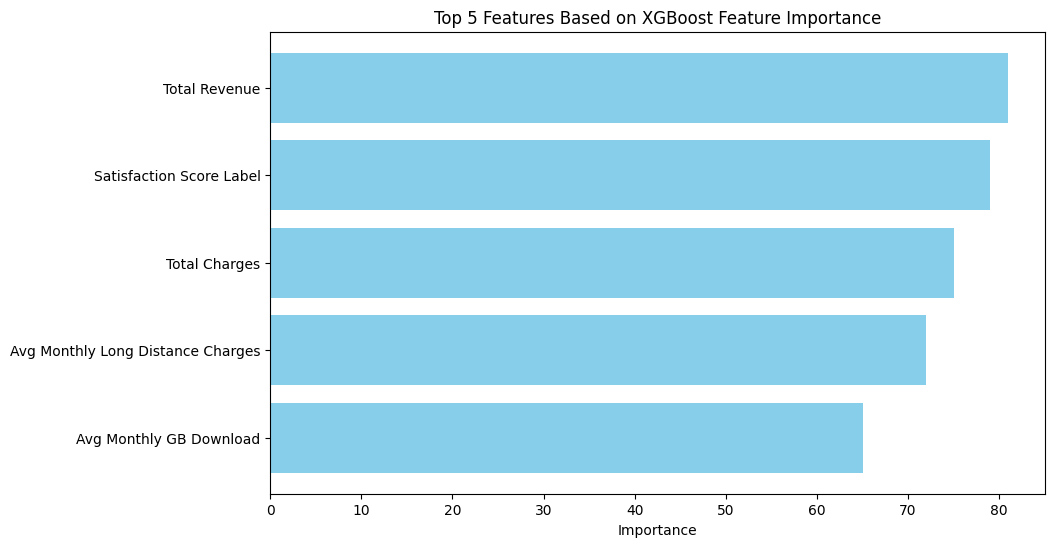


Feature: Total Revenue
Most influential PC: PC1
Loading value for this feature on PC1: 0.3244

Feature: Satisfaction Score Label
Most influential PC: PC6
Loading value for this feature on PC6: 0.4161

Feature: Total Charges
Most influential PC: PC1
Loading value for this feature on PC1: 0.3349

Feature: Avg Monthly Long Distance Charges
Most influential PC: PC5
Loading value for this feature on PC5: 0.4120

Feature: Avg Monthly GB Download
Most influential PC: PC3
Loading value for this feature on PC3: -0.3865


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#get the loadings matrix from pca (each column corresponds to a PC)
loadings = pca.components_
#loadings = the correlation of each original feature with each pc

#top N most important features based on xgboost feature importance
top_n = 5

#feature importances from the trained model (using 'weight')
feature_importances = xgb_model3.get_score(importance_type='weight')

sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

#top features (original features, not PCs)
top_features = [feature[0] for feature in sorted_importances[:top_n]]
importances = [feature[1] for feature in sorted_importances[:top_n]]

#plot the feature importances from xgboost
plt.figure(figsize=(10, 6))
plt.barh(top_features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Features Based on XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#loadings for the top principal components
for feature in top_features:
    #get the index of the feature in the original dataset
    feature_index = X.columns.get_loc(feature)

    #get the principal component where this feature has the highest loading
    loadings_abs = np.abs(loadings)  #absolute values to find the most influential features
    most_influential_pc = np.argmax(loadings_abs[:, feature_index])  #find the PC with the highest influence

    print(f"\nFeature: {feature}")
    print(f"Most influential PC: PC{most_influential_pc + 1}")
    print(f"Loading value for this feature on PC{most_influential_pc + 1}: {loadings[most_influential_pc, feature_index]:.4f}")


In [ ]:
#now we are going to train our model one last time with only the features that are needed to explain 90% of the variance

columns = ['Gender', 'Total Extra Data Charges', 'Device Protection Plan', 'Number of Dependents', 'Satisfaction Score Label', 'Unlimited Data',
'Referred a Friend', 'Total Charges', 'Avg Monthly Long Distance Charges', 'Under 30', 'Multiple Lines', 'Dependents', 'Streaming Music',
'Paperless Billing', 'Avg Monthly GB Download', 'Age', 'Married', 'CLTV', 'Online Security', 'Senior Citizen', 'Phone Service',
'Online Backup + Device Protection Plan', 'Online Backup', 'Total Revenue', 'Total Refunds', 'Premium Tech Support', 'Satisfaction Score', 'Streaming Movies']

X_train = X_train2[columns]

X_test = X_test2[columns]

import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report

train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

param_dist = {
    'learning_rate': uniform(loc=0, scale=0.15),
    'max_depth': [1, 2, 3],
    'n_estimators': randint(10, 200),
    'subsample': uniform(loc=0.6, scale=0.4),
    'colsample_bytree': uniform(loc=0.6, scale=0.4)
}

xgb_classifier4 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=0)

best_xgb_classifier4 = RandomizedSearchCV(estimator=xgb_classifier4, param_distributions=param_dist,
                                         n_iter=500, n_jobs=-1, cv=5, verbose=2, random_state=0)

best_xgb_classifier4.fit(X_train, y_train)

print(f"Best n_estimators: {best_xgb_classifier4.best_params_['n_estimators']}, "
      f"Best Learning Rate: {best_xgb_classifier4.best_params_['learning_rate']}, "
      f"Best Accuracy: {best_xgb_classifier4.best_score_}")

best_params4 = best_xgb_classifier4.best_params_
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': best_params4['max_depth'],
    'eta': best_params4['learning_rate'],
    'subsample': best_params4['subsample'],
    'colsample_bytree': best_params4['colsample_bytree']
}

xgb_model4 = xgb.train(params, train_dmatrix, num_boost_round=best_params['n_estimators'])

y_pred_prob4 = xgb_model4.predict(test_dmatrix)

y_pred4 = [1 if prob > 0.5 else 0 for prob in y_pred_prob4]

balanced_accuracy4 = balanced_accuracy_score(y_test, y_pred4)
print(f'Balanced Accuracy: {balanced_accuracy4:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred4))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best n_estimators: 186, Best Learning Rate: 0.05564598779671371, Best Accuracy: 0.953497000004728
Balanced Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1036
           1       0.97      0.85      0.90       373

    accuracy                           0.95      1409
   macro avg       0.96      0.92      0.94      1409
weighted avg       0.95      0.95      0.95      1409



SENSITIVITY ANALYSIS

In [ ]:
# Drop 'Predicted Churn' from the test dataset if it exists
if 'Predicted Churn' in X_test.columns:
    X_test = X_test.drop(columns=['Predicted Churn'])

# Sensitivity analysis
sensitivity_results = {}

for feature in columns:
    print(f"Analyzing sensitivity by removing feature: {feature}")

    # Create new training and testing datasets without the feature
    X_train_dropped = X_train.drop(columns=[feature])
    X_test_dropped = X_test.drop(columns=[feature])

    # Convert datasets to DMatrix
    train_dmatrix_dropped = xgb.DMatrix(X_train_dropped, label=y_train)
    test_dmatrix_dropped = xgb.DMatrix(X_test_dropped, label=y_test)

    # Train the model without the feature
    xgb_model = xgb.train(params, train_dmatrix_dropped, num_boost_round=best_params4['n_estimators'])

    # Predict on the test set
    y_pred_prob = xgb_model.predict(test_dmatrix_dropped)
    y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

    # Calculate the balanced accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    # Store the result
    sensitivity_results[feature] = balanced_acc

# Convert results to a DataFrame for easier interpretation
sensitivity_df = pd.DataFrame.from_dict(sensitivity_results, orient='index', columns=['Balanced Accuracy'])
sensitivity_df['Accuracy Drop'] = balanced_accuracy4 - sensitivity_df['Balanced Accuracy']

# Sort the results by the impact of removing the feature
sensitivity_df = sensitivity_df.sort_values(by='Accuracy Drop', ascending=False)

print(sensitivity_df)


Analyzing sensitivity by removing feature: Gender
Analyzing sensitivity by removing feature: Total Extra Data Charges
Analyzing sensitivity by removing feature: Device Protection Plan
Analyzing sensitivity by removing feature: Number of Dependents
Analyzing sensitivity by removing feature: Satisfaction Score Label
Analyzing sensitivity by removing feature: Unlimited Data
Analyzing sensitivity by removing feature: Referred a Friend
Analyzing sensitivity by removing feature: Total Charges
Analyzing sensitivity by removing feature: Avg Monthly Long Distance Charges
Analyzing sensitivity by removing feature: Under 30
Analyzing sensitivity by removing feature: Multiple Lines
Analyzing sensitivity by removing feature: Dependents
Analyzing sensitivity by removing feature: Streaming Music
Analyzing sensitivity by removing feature: Paperless Billing
Analyzing sensitivity by removing feature: Avg Monthly GB Download
Analyzing sensitivity by removing feature: Age
Analyzing sensitivity by removing

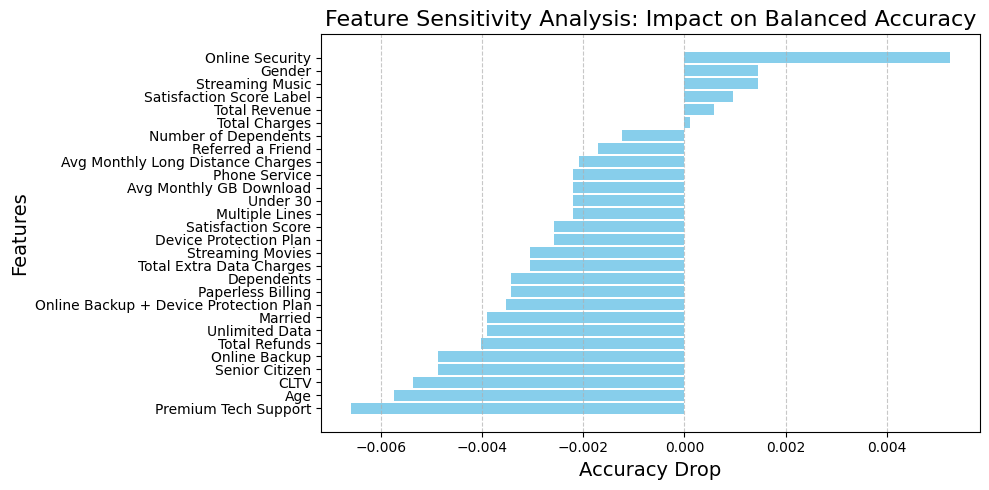

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 5))
plt.barh(sensitivity_df.index, sensitivity_df['Accuracy Drop'], color='skyblue')
plt.xlabel('Accuracy Drop', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Sensitivity Analysis: Impact on Balanced Accuracy', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest impact feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


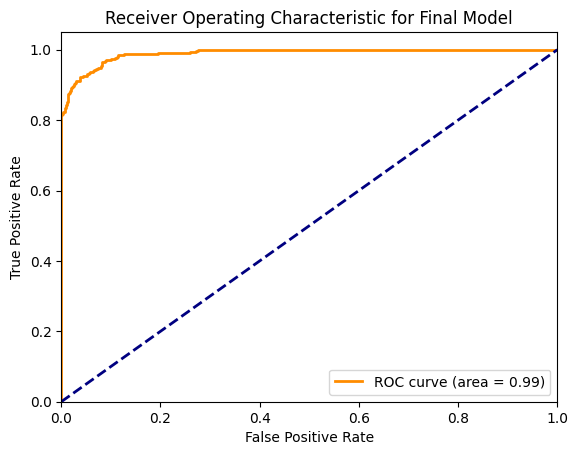

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob4)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Final Model')
plt.legend(loc="lower right")
plt.show()


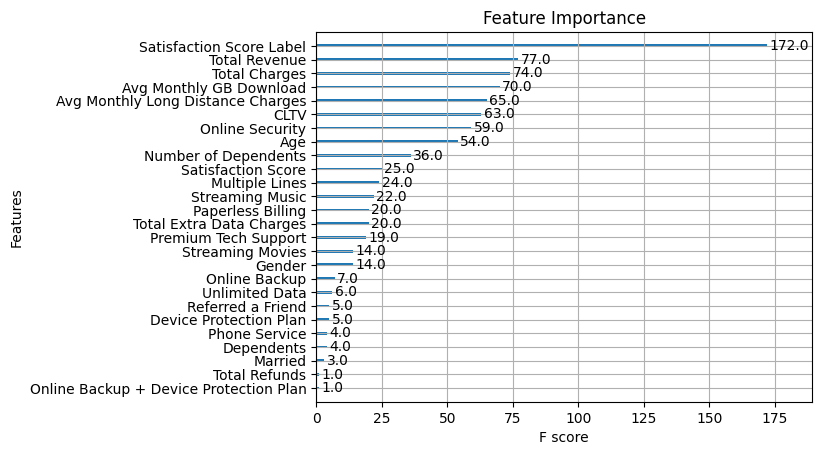

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

#extract the best xgboost model from randomizedsearchcv
best_model4 = best_xgb_classifier4.best_estimator_

#plotting the feature importance
plot_importance(best_model4)
plt.title("Feature Importance")
plt.show()

In [ ]:
# Assuming y_pred4 contains your predicted labels (1 for churn, 0 for non-churn)
X_test['Predicted Churn'] = y_pred4  # Assign the predicted churn values to X_test

# Calculate the proportion of senior citizens for churned and non-churned customers
proportion_senior_churned = X_test[X_test['Predicted Churn'] == 1]['Senior Citizen'].mean()
proportion_senior_non_churned = X_test[X_test['Predicted Churn'] == 0]['Senior Citizen'].mean()

# Print the results
print(f"Proportion of senior citizens among predicted churned customers: {proportion_senior_churned:.2f}")
print(f"Proportion of senior citizens among predicted non-churned customers: {proportion_senior_non_churned:.2f}")


Proportion of senior citizens among predicted churned customers: 0.26
Proportion of senior citizens among predicted non-churned customers: 0.12


<ipython-input-34-9a33dbc2e0e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Predicted Churn'] = y_pred4  # Assign the predicted churn values to X_test


In [ ]:
import pandas as pd

# Combine test data, true labels, and predicted labels into a single DataFrame for analysis
test_results = X_test.copy()
test_results['True Label'] = y_test.values
test_results['Predicted Label'] = y_pred4

# List of features to analyze
features_to_analyze = ['Satisfaction Score Label', 'Total Revenue', 'Total Charges', 'Online Security', 'Avg Monthly GB Download']

# Initialize a dictionary to store statistics
statistics = {}

# Analyze statistics for each feature
for feature in features_to_analyze:
    # Group data by Predicted Label
    grouped_data = test_results.groupby('Predicted Label')[feature]

    # Compute descriptive statistics for each group
    stats = grouped_data.agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
    statistics[feature] = stats

    # Print the statistics for this feature
    print(f"\nStatistics for {feature}:")
    print(stats)

# Optionally, store the results in a dictionary or export to a file
statistics_df = pd.concat({feature: statistics[feature] for feature in features_to_analyze}, axis=0)
statistics_df.to_csv('feature_statistics_by_predicted_churn.csv', index=False)



Statistics for Satisfaction Score Label:
   Predicted Label      mean  median       std  min  max  count
0                0  3.743756     4.0  0.787648    3    5   1081
1                1  1.600610     1.0  0.705331    1    3    328

Statistics for Total Revenue:
   Predicted Label         mean   median          std    min       max  count
0                0  3290.374561  2532.68  2857.255030  23.24  11688.90   1081
1                1  1762.765091   745.09  2365.744006  24.96  10718.96    328

Statistics for Total Charges:
   Predicted Label         mean   median          std   min     max  count
0                0  2459.468548  1671.60  2288.488913  19.2  8529.5   1081
1                1  1381.604268   549.05  1835.624837  19.3  8127.6    328

Statistics for Online Security:
   Predicted Label      mean  median       std  min  max  count
0                0  0.315449     0.0  0.464909    0    1   1081
1                1  0.182927     0.0  0.387197    0    1    328

Statistics for Avg 

In [ ]:
X_train2.shape[1]

34

In [ ]:
X_test.shape[1]

29

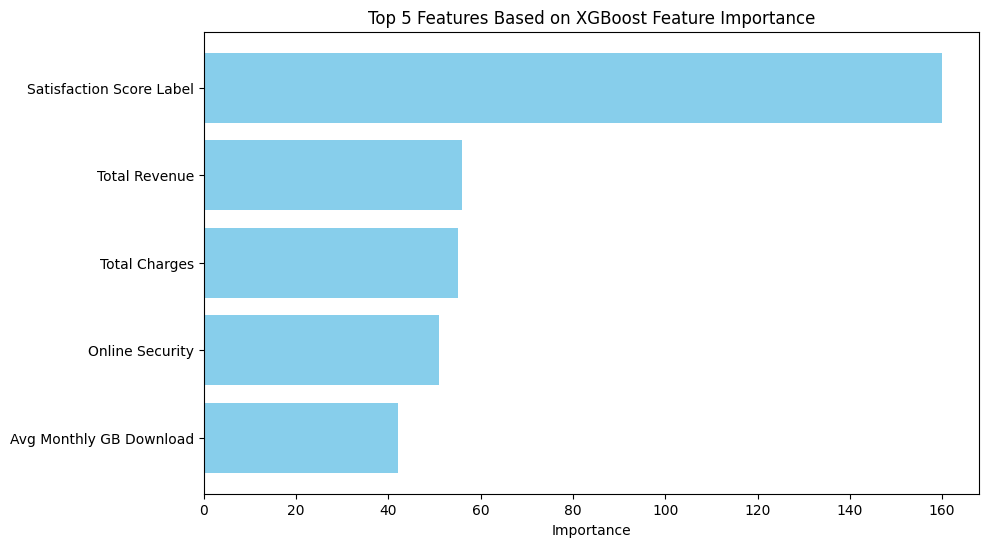


Feature: Satisfaction Score Label
Most influential PC: PC6
Loading value for this feature on PC6: 0.4161

Feature: Total Revenue
Most influential PC: PC1
Loading value for this feature on PC1: 0.3244

Feature: Total Charges
Most influential PC: PC1
Loading value for this feature on PC1: 0.3349

Feature: Online Security
Most influential PC: PC18
Loading value for this feature on PC18: 0.5998

Feature: Avg Monthly GB Download
Most influential PC: PC3
Loading value for this feature on PC3: -0.3865


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#get the loadings matrix from pca (each column corresponds to a PC)
loadings = pca.components_
#loadings = the correlation of each original feature with each pc

#top N most important features based on xgboost feature importance
top_n = 5

#feature importances from the trained model (using 'weight')
feature_importances = xgb_model4.get_score(importance_type='weight')

sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

#top features (original features, not PCs)
top_features = [feature[0] for feature in sorted_importances[:top_n]]
importances = [feature[1] for feature in sorted_importances[:top_n]]

#plot the feature importances from xgboost
plt.figure(figsize=(10, 6))
plt.barh(top_features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Features Based on XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#loadings for the top principal components
for feature in top_features:
    #get the index of the feature in the original dataset
    feature_index = X.columns.get_loc(feature)

    #get the principal component where this feature has the highest loading
    loadings_abs = np.abs(loadings)  #absolute values to find the most influential features
    most_influential_pc = np.argmax(loadings_abs[:, feature_index])  #find the PC with the highest influence

    print(f"\nFeature: {feature}")
    print(f"Most influential PC: PC{most_influential_pc + 1}")
    print(f"Loading value for this feature on PC{most_influential_pc + 1}: {loadings[most_influential_pc, feature_index]:.4f}")


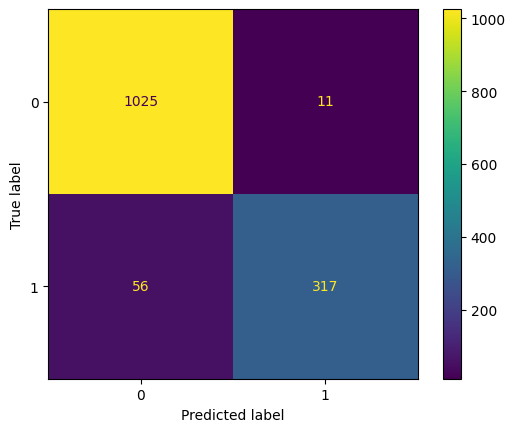

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

# 56 false negatives, 11 false positives

In [ ]:
misclassified_indices = (y_test != y_pred4)
misclassified_cases = X_test[misclassified_indices]
misclassified_cases.head()


,Gender,Total Extra Data Charges,Device Protection Plan,Number of Dependents,Satisfaction Score Label,Unlimited Data,Referred a Friend,Total Charges,Avg Monthly Long Distance Charges,Under 30,...,Senior Citizen,Phone Service,Online Backup + Device Protection Plan,Online Backup,Total Revenue,Total Refunds,Premium Tech Support,Satisfaction Score,Streaming Movies,Predicted Churn
2234,0,0,0,0,3,1,0,315.30,30.18,0,...,0,1,0,1,405.84,0.0,1,3,1,0
1726,1,0,1,0,3,1,0,4242.35,5.62,0,...,0,1,0,0,4528.97,0.0,0,3,0,0
144,0,0,1,0,3,1,0,5510.65,34.58,0,...,1,1,1,1,7447.13,0.0,0,3,1,0
1386,1,0,0,0,3,1,1,2564.30,13.45,0,...,0,1,0,0,3021.60,0.0,0,3,0,0
444,1,0,0,0,3,1,0,2122.05,42.91,0,...,1,1,0,1,3280.62,0.0,0,3,0,0


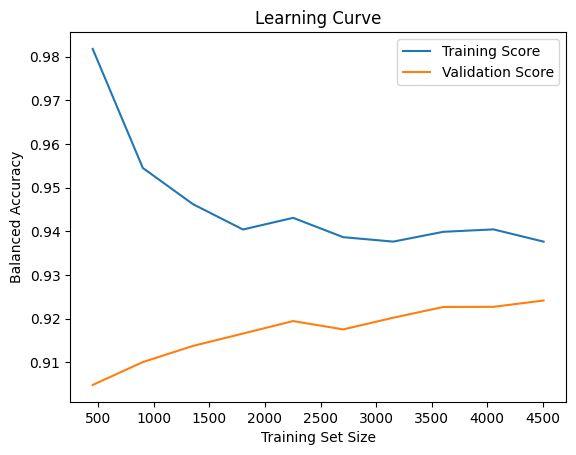

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_xgb_classifier4.best_estimator_,
    X_train, y_train,
    cv=5, scoring='balanced_accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()


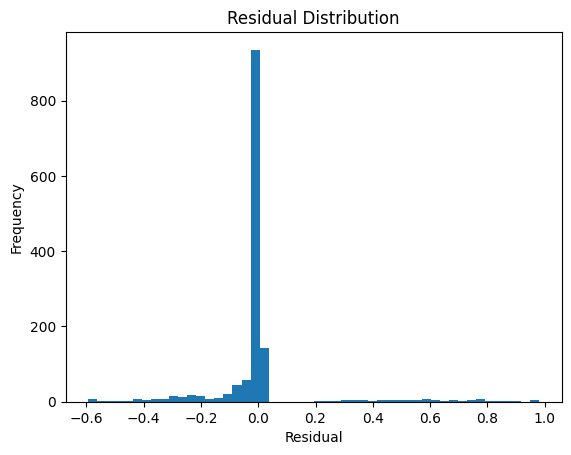

In [ ]:
#valuating residuals
residuals = y_test - y_pred_prob4
plt.hist(residuals, bins=50)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()


Evaluating model performance on subgroups of data

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred4 = np.array(y_pred4)

subgroup_feature = 'Gender'
subgroups = X_test[subgroup_feature].unique()

for group in subgroups:
    subgroup_indices = X_test[subgroup_feature] == group
    y_true_subgroup = y_test[subgroup_indices]
    y_pred_subgroup = y_pred4[subgroup_indices]

    print(f"Performance for {subgroup_feature} = {group}:")
    print(classification_report(y_true_subgroup, y_pred_subgroup))


Performance for Gender = 1:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       488
           1       0.97      0.82      0.89       181

    accuracy                           0.94       669
   macro avg       0.95      0.91      0.93       669
weighted avg       0.95      0.94      0.94       669

Performance for Gender = 0:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       548
           1       0.97      0.88      0.92       192

    accuracy                           0.96       740
   macro avg       0.96      0.93      0.95       740
weighted avg       0.96      0.96      0.96       740



In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Ensure y_pred4 is a NumPy array
y_pred4 = np.array(y_pred4)

# Segment your test data by the 'Senior Citizen' feature
subgroup_feature = 'Senior Citizen'
subgroups = X_test[subgroup_feature].unique()

# Evaluate performance for each subgroup
for group in subgroups:
    subgroup_indices = X_test[subgroup_feature] == group
    y_true_subgroup = y_test[subgroup_indices]
    y_pred_subgroup = y_pred4[subgroup_indices]

    print(f"Performance for {subgroup_feature} = {group}:")
    print(classification_report(y_true_subgroup, y_pred_subgroup))


Performance for Senior Citizen = 0:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       914
           1       0.96      0.85      0.90       277

    accuracy                           0.96      1191
   macro avg       0.96      0.92      0.94      1191
weighted avg       0.96      0.96      0.96      1191

Performance for Senior Citizen = 1:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       122
           1       0.98      0.85      0.91        96

    accuracy                           0.93       218
   macro avg       0.94      0.92      0.92       218
weighted avg       0.93      0.93      0.93       218



# Step 4: Optimize (minimize churn)

In [ ]:
#using predicted probabilities rom our model
import cvxpy as cp

churn_probabilities = np.array(y_pred_prob4)

n_customers = len(churn_probabilities)
intervention_decisions = cp.Variable(n_customers, boolean=True)  #binary decision variables: 1 if intervened, 0 otherwise

#parameters
threshold = 0.7  #probability threshold (intervene for customers with churn_prob > 0.7)
intervention_effectiveness = np.array([0.1] * n_customers)  #reduction in churn probability if intervened

#obective is ot minimize total churn
objective = cp.Minimize(cp.sum(churn_probabilities - intervention_decisions * intervention_effectiveness))

constraints = []

#probability threshold constraint: Only intervene for customers with churn_prob > threshold
for i in range(n_customers):
    if churn_probabilities[i] < threshold:
        constraints.append(intervention_decisions[i] == 0)

problem = cp.Problem(objective, constraints)

problem.solve(solver=cp.ECOS_BB)

optimal_decisions = intervention_decisions.value
intervened_customer_indices = [i for i in range(n_customers) if optimal_decisions[i] > 0.5]

print("Number of Customers to Intervene:", len(intervened_customer_indices))
print("Intervened Customer Indices:", intervened_customer_indices)

#retrieve customer data for those selected for intervention
intervened_customers = X_test.iloc[intervened_customer_indices]
intervened_customers


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


Number of Customers to Intervene: 293
Intervened Customer Indices: [0, 8, 14, 15, 16, 24, 52, 55, 58, 64, 65, 82, 92, 96, 97, 98, 104, 111, 116, 118, 121, 122, 129, 133, 141, 150, 152, 153, 155, 156, 157, 161, 171, 173, 184, 190, 194, 199, 200, 203, 204, 207, 214, 215, 222, 231, 232, 234, 254, 258, 259, 260, 275, 276, 277, 282, 297, 304, 305, 309, 311, 317, 329, 334, 336, 337, 341, 350, 357, 360, 362, 379, 381, 386, 394, 405, 409, 414, 417, 419, 423, 442, 448, 450, 451, 455, 457, 460, 465, 467, 475, 487, 488, 491, 493, 499, 502, 507, 517, 524, 532, 535, 537, 541, 547, 553, 557, 562, 566, 574, 580, 581, 582, 587, 594, 606, 615, 624, 628, 639, 647, 656, 657, 662, 664, 665, 675, 677, 687, 689, 693, 696, 703, 707, 709, 713, 717, 723, 727, 728, 730, 732, 738, 739, 740, 744, 752, 754, 758, 759, 770, 773, 774, 780, 783, 794, 796, 798, 801, 806, 812, 815, 820, 823, 825, 830, 832, 836, 839, 841, 859, 861, 862, 872, 876, 882, 883, 895, 901, 902, 904, 908, 912, 917, 919, 922, 929, 932, 933, 945, 

,Gender,Total Extra Data Charges,Device Protection Plan,Number of Dependents,Satisfaction Score Label,Unlimited Data,Referred a Friend,Total Charges,Avg Monthly Long Distance Charges,Under 30,...,Senior Citizen,Phone Service,Online Backup + Device Protection Plan,Online Backup,Total Revenue,Total Refunds,Premium Tech Support,Satisfaction Score,Streaming Movies,Predicted Churn
2200,1,0,0,0,1,1,0,4517.25,16.43,0,...,0,1,0,0,5388.04,0.00,0,1,0,1
1278,0,0,1,0,1,1,0,3941.70,4.48,1,...,0,1,0,0,4143.30,0.00,1,1,0,1
202,0,0,0,0,1,1,0,3734.25,47.39,0,...,1,1,0,0,5535.07,0.00,1,1,1,1
134,0,0,1,0,1,1,0,179.25,21.57,0,...,1,1,0,0,222.39,0.00,0,1,1,1
154,1,0,0,0,2,1,0,5574.75,10.78,0,...,1,1,0,0,6202.64,8.13,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,0,0,0,1,1,1,273.75,25.77,0,...,1,1,0,0,351.06,0.00,1,1,0,1
1607,1,0,0,0,1,1,0,25.15,0.00,0,...,0,0,0,0,25.15,0.00,0,1,0,1
413,0,0,0,0,2,1,0,4504.55,14.22,0,...,1,1,0,1,5172.89,0.00,1,2,0,1
1985,0,0,0,0,1,1,0,2404.15,16.63,0,...,0,1,0,0,2919.68,0.00,1,1,0,1


<ipython-input-44-24e7fd79e29c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=intervened_customers, palette='Blues', dodge=False)  # Adjusted to prevent hue issues
<ipython-input-44-24e7fd79e29c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=intervened_customers, palette='Blues', dodge=False)  # Adjusted to prevent hue issues
<ipython-input-44-24e7fd79e29c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=intervened_customers, palette='Blues', dodge=False)  # Adjusted to prevent hue

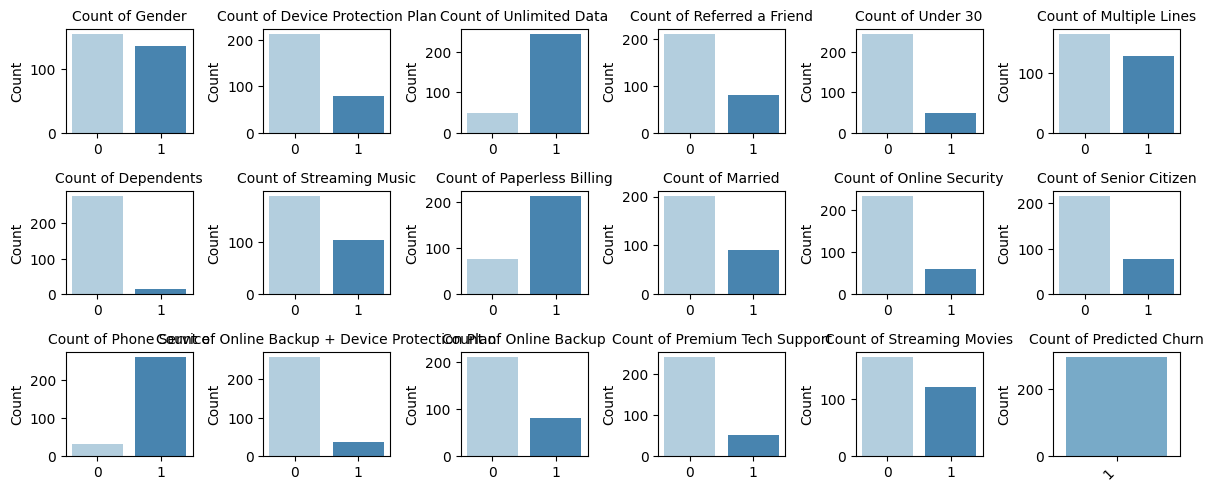

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure pandas is imported

# Assuming intervened_customers is defined
# Identify binary columns (if not already defined)
binary_columns = [col for col in intervened_customers.columns if set(intervened_customers[col].unique()).issubset({0, 1})]

# Count occurrences of 1's and 0's for each binary feature
binary_counts = intervened_customers[binary_columns].apply(lambda x: x.value_counts())

# Plotting
plt.figure(figsize=(12, 8))

# Create subplots for each binary feature
for idx, column in enumerate(binary_columns, 1):
    plt.subplot(5, 6, idx)
    sns.countplot(x=column, data=intervened_customers, palette='Blues', dodge=False)  # Adjusted to prevent hue issues

    plt.title(f'Count of {column}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()


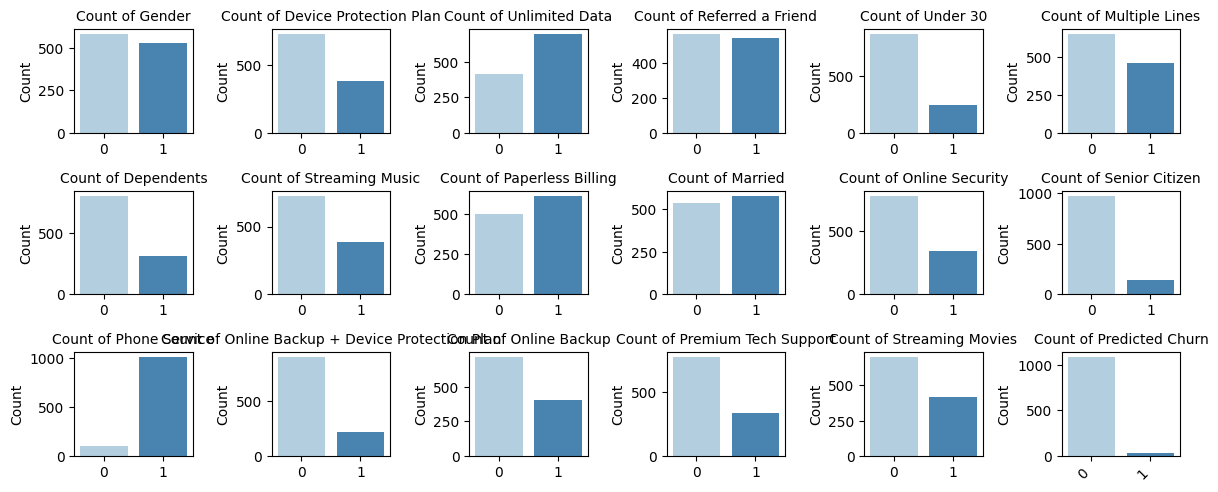

In [ ]:
#FOR NON-INTERVENED CUSTOMERS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure pandas is imported
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Filter customers who are NOT being intervened
non_intervened_customers = X_test.iloc[[i for i in range(len(X_test)) if i not in intervened_customer_indices]]

# Identify binary columns for non-intervened customers
binary_columns = [col for col in non_intervened_customers.columns if set(non_intervened_customers[col].unique()).issubset({0, 1})]

# Count occurrences of 1's and 0's for each binary feature
binary_counts = non_intervened_customers[binary_columns].apply(lambda x: x.value_counts())

# Plotting
plt.figure(figsize=(12, 8))

# Create subplots for each binary feature
for idx, column in enumerate(binary_columns, 1):
    plt.subplot(5, 6, idx)  # Adjusted to fit up to 30 features in subplots
    sns.countplot(x=column, data=non_intervened_customers, palette='Blues', dodge=False)  # Prevent hue issues

    plt.title(f'Count of {column}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()


In [ ]:
#FOR INTERVENED CUSTOMERS - OPTIMIZATION MODEL
# Assuming 'satisfaction_score' is the column for customer satisfaction scores
# Ensure 'satisfaction_score' is included in the list of float columns
float_columns = intervened_customers.select_dtypes(include=['float64']).columns

# Convert to a list and add 'satisfaction_score' if not already in the columns
float_columns = list(float_columns)  # Convert to a list first
if 'satisfaction_score' not in float_columns:
    float_columns.append('Satisfaction Score Label')
if 'Avg Monthly GB Download' not in float_columns:
    float_columns.append('Avg Monthly GB Download')

# Get the descriptive statistics for continuous features including satisfaction score
continuous_stats = intervened_customers[float_columns].describe()

continuous_stats


,Total Charges,Avg Monthly Long Distance Charges,Total Revenue,Total Refunds,Satisfaction Score Label,Avg Monthly GB Download
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,1508.623720,22.951775,1924.023993,0.844130,1.433447,22.546075
std,1898.708696,15.977461,2449.006997,5.237056,0.542547,17.944228
min,19.300000,0.000000,24.960000,0.000000,1.000000,0.000000
25%,89.550000,8.590000,127.980000,0.000000,1.000000,10.000000
50%,712.850000,22.820000,878.690000,0.000000,1.000000,20.000000
75%,2264.050000,37.600000,2617.450000,0.000000,2.000000,27.000000
max,8127.600000,49.700000,10718.960000,49.570000,3.000000,85.000000


In [ ]:
# FOR NON-INTERVENED CUSTOMERS - OPTIMIZATION MODEL

# Assuming 'satisfaction_score' is the column for customer satisfaction scores
# Ensure 'satisfaction_score' is included in the list of float columns
float_columns = non_intervened_customers.select_dtypes(include=['float64']).columns

# Convert to a list and add 'satisfaction_score' if not already in the columns
float_columns = list(float_columns)  # Convert to a list first
if 'satisfaction_score' not in float_columns:
    float_columns.append('Satisfaction Score Label')  # Append the column name manually
if 'Avg Monthly GB Download' not in float_columns:
    float_columns.append('Avg Monthly GB Download')

# Get the descriptive statistics for continuous features including satisfaction score
continuous_stats = non_intervened_customers[float_columns].describe()

continuous_stats


,Total Charges,Avg Monthly Long Distance Charges,Total Revenue,Total Refunds,Satisfaction Score Label,Avg Monthly GB Download
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,2392.316263,22.808539,3200.127975,2.074731,3.720430,19.823477
std,2283.972813,15.365423,2857.633567,8.206032,0.785961,21.150332
min,19.200000,0.000000,23.240000,0.000000,3.000000,0.000000
25%,485.550000,9.322500,770.907500,0.000000,3.000000,0.000000
50%,1533.750000,22.650000,2424.635000,0.000000,4.000000,15.000000
75%,3894.637500,36.172500,5092.192500,0.000000,4.000000,27.000000
max,8529.500000,49.990000,11688.900000,49.790000,5.000000,85.000000


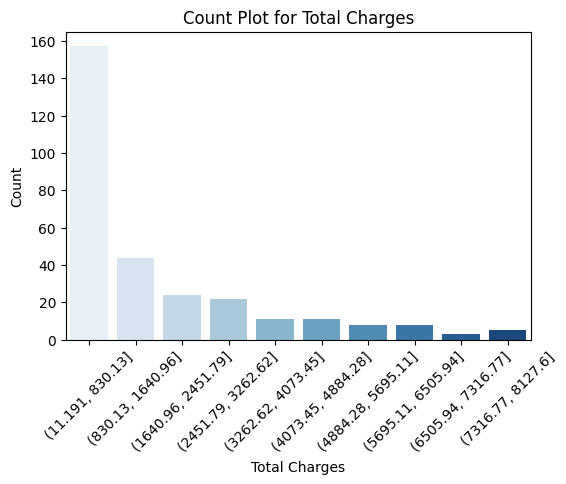

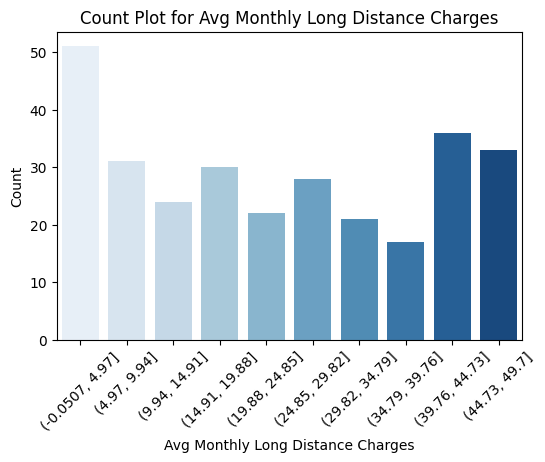

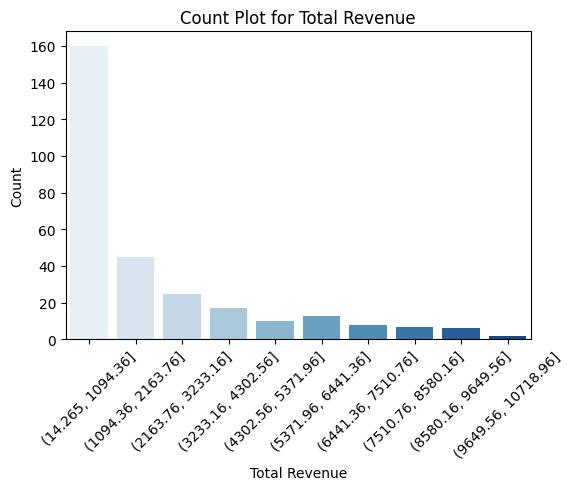

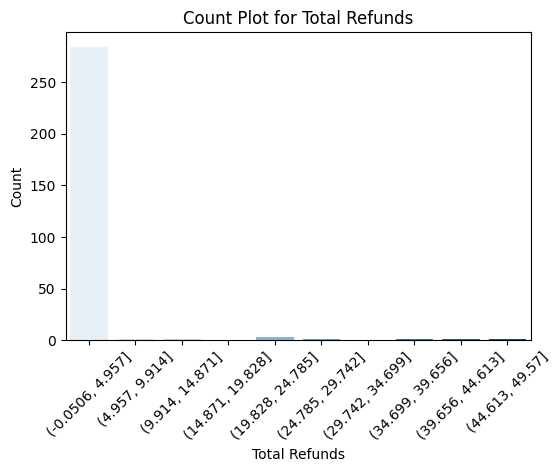

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

float_columns = intervened_customers.select_dtypes(include=['float64']).columns

for column in float_columns:
    bins = 10
    binned_column = pd.cut(intervened_customers[column], bins=bins, include_lowest=True)

    plt.figure(figsize=(6, 4))
    sns.countplot(x=binned_column, palette='Blues')

    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Assuming y_pred_prob4 contains the predicted probabilities from xgbmodel4
# and y_test contains the actual churn labels (1 for churned, 0 for not churned)
# Also assuming 'Satisfaction Score Label' is a column in the DataFrame

# Get the indices of customers predicted to churn (probability > 0.5)
predicted_churned_indices = np.where(y_pred_prob4 > 0.5)[0]
predicted_non_churned_indices = np.where(y_pred_prob4 <= 0.5)[0]

# Retrieve the 'Satisfaction Score Label' for predicted churned vs non-churned customers
predicted_churned_satisfaction_scores = X_test.iloc[predicted_churned_indices]['Satisfaction Score Label'].values
predicted_non_churned_satisfaction_scores = X_test.iloc[predicted_non_churned_indices]['Satisfaction Score Label'].values

# Create a DataFrame to hold the predicted satisfaction scores and churn labels
satisfaction_df = pd.DataFrame({
    'predicted_satisfaction_score': np.concatenate([predicted_churned_satisfaction_scores, predicted_non_churned_satisfaction_scores]),
    'predicted_churned': [1] * len(predicted_churned_satisfaction_scores) + [0] * len(predicted_non_churned_satisfaction_scores)
})

# Descriptive statistics for predicted churned vs non-churned customers based on Satisfaction Score Label
churned_satisfaction_stats = satisfaction_df[satisfaction_df['predicted_churned'] == 1]['predicted_satisfaction_score'].describe()
non_churned_satisfaction_stats = satisfaction_df[satisfaction_df['predicted_churned'] == 0]['predicted_satisfaction_score'].describe()

# Print the statistics
print("Descriptive Statistics for Predicted Churned Customers (Satisfaction Score):")
print(churned_satisfaction_stats)
print("\nDescriptive Statistics for Predicted Non-Churned Customers (Satisfaction Score):")
print(non_churned_satisfaction_stats)


Descriptive Statistics for Predicted Churned Customers (Satisfaction Score):
count    328.000000
mean       1.600610
std        0.705331
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: predicted_satisfaction_score, dtype: float64

Descriptive Statistics for Predicted Non-Churned Customers (Satisfaction Score):
count    1081.000000
mean        3.743756
std         0.787648
min         3.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: predicted_satisfaction_score, dtype: float64


# Step 5: Sensitivity Analysis

In [ ]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score

#copy of the test set for perturbation
X_test_copy = X_test.copy()

sensitivity_results = []

for column in X_test.columns:

    original_values = X_test_copy[column].copy()

    #perturb the column by adding random noise based on the range of values
    noise = np.random.normal(0, np.std(X_test_copy[column]), size=X_test_copy[column].shape)
    X_test_copy[column] = X_test_copy[column] + noise

    #predict the output with the perturbed data
    test_dmatrix_copy = xgb.DMatrix(X_test_copy, label=y_test)
    y_pred_prob_copy = xgb_model4.predict(test_dmatrix_copy)
    y_pred_copy = [1 if prob > 0.5 else 0 for prob in y_pred_prob_copy]

    #calculate the balanced accuracy of the predictions
    balanced_accuracy_copy = balanced_accuracy_score(y_test, y_pred_copy)

    #store the sensitivity results for this feature
    sensitivity_results.append({
        'Feature': column,
        'Balanced Accuracy': balanced_accuracy_copy
    })

    #restore the original values of the column for the next iteration
    X_test_copy[column] = original_values

sensitivity_df = pd.DataFrame(sensitivity_results)

#sort by change in balanced accuracy (relative to the original accuracy)
sensitivity_df['Accuracy Change'] = sensitivity_df['Balanced Accuracy'] - balanced_accuracy4
sensitivity_df = sensitivity_df.sort_values(by='Accuracy Change', ascending=False)

print(sensitivity_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(sensitivity_df['Feature'], sensitivity_df['Accuracy Change'])
plt.xlabel('Change in Balanced Accuracy')
plt.ylabel('Features')
plt.title('Sensitivity Analysis: Change in Balanced Accuracy due to Feature Perturbation')
plt.show()


ValueError: feature_names mismatch: ['Gender', 'Total Extra Data Charges', 'Device Protection Plan', 'Number of Dependents', 'Satisfaction Score Label', 'Unlimited Data', 'Referred a Friend', 'Total Charges', 'Avg Monthly Long Distance Charges', 'Under 30', 'Multiple Lines', 'Dependents', 'Streaming Music', 'Paperless Billing', 'Avg Monthly GB Download', 'Age', 'Married', 'CLTV', 'Online Security', 'Senior Citizen', 'Phone Service', 'Online Backup + Device Protection Plan', 'Online Backup', 'Total Revenue', 'Total Refunds', 'Premium Tech Support', 'Satisfaction Score', 'Streaming Movies'] ['Gender', 'Total Extra Data Charges', 'Device Protection Plan', 'Number of Dependents', 'Satisfaction Score Label', 'Unlimited Data', 'Referred a Friend', 'Total Charges', 'Avg Monthly Long Distance Charges', 'Under 30', 'Multiple Lines', 'Dependents', 'Streaming Music', 'Paperless Billing', 'Avg Monthly GB Download', 'Age', 'Married', 'CLTV', 'Online Security', 'Senior Citizen', 'Phone Service', 'Online Backup + Device Protection Plan', 'Online Backup', 'Total Revenue', 'Total Refunds', 'Premium Tech Support', 'Satisfaction Score', 'Streaming Movies', 'Predicted Churn']
training data did not have the following fields: Predicted Churn

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 3 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:650: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 4 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/

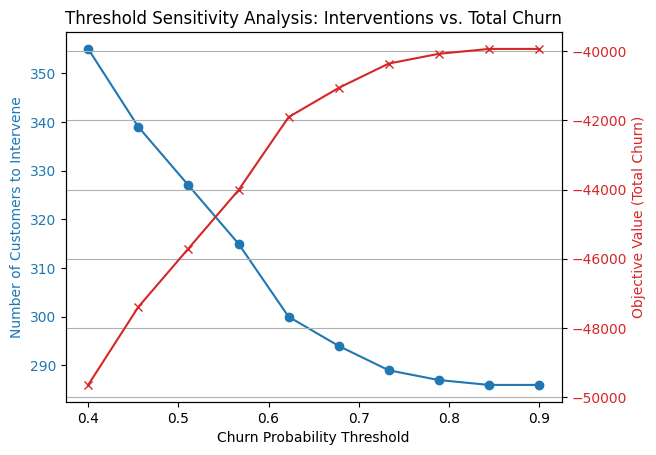

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

churn_probabilities = np.array(y_pred_prob4)


n_customers = len(churn_probabilities)
intervention_decisions = cp.Variable(n_customers, boolean=True)

intervention_effectiveness = np.array([0.1] * n_customers)

thresholds = np.linspace(0.4, 0.9, 10)  #vary the probability threshold between 0.4 and 0.9
optimal_objectives = []
intervened_customer_counts = []

#perform sensitivity analysis
for threshold in thresholds:
    #ojective: minimize total churn
    objective = cp.Minimize(cp.sum(churn_probabilities - intervention_decisions * intervention_effectiveness))

    constraints = []

    for i in range(n_customers):
        if churn_probabilities[i] < threshold:
            constraints.append(intervention_decisions[i] == 0)

    problem = cp.Problem(objective, constraints)

    problem.solve(solver=cp.ECOS_BB)

    optimal_decisions = intervention_decisions.value
    intervened_customer_indices = [i for i in range(n_customers) if optimal_decisions[i] > 0.5]

    optimal_objectives.append(objective.value)
    intervened_customer_counts.append(len(intervened_customer_indices))

fig, ax1 = plt.subplots()

#plot number of customers to intervene vs. threshold
ax1.set_xlabel('Churn Probability Threshold')
ax1.set_ylabel('Number of Customers to Intervene', color='tab:blue')
ax1.plot(thresholds, intervened_customer_counts, marker='o', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

#create a second y-axis to plot the objective value
ax2 = ax1.twinx()
ax2.set_ylabel('Objective Value (Total Churn)', color='tab:red')
ax2.plot(thresholds, optimal_objectives, marker='x', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Threshold Sensitivity Analysis: Interventions vs. Total Churn')
plt.grid(True)

plt.show()


# Step 6: Additional EDA based on model output

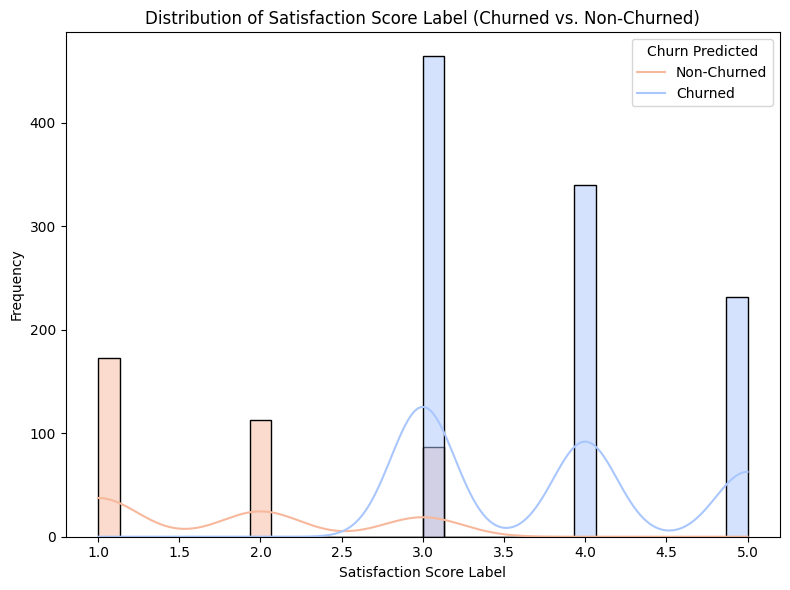

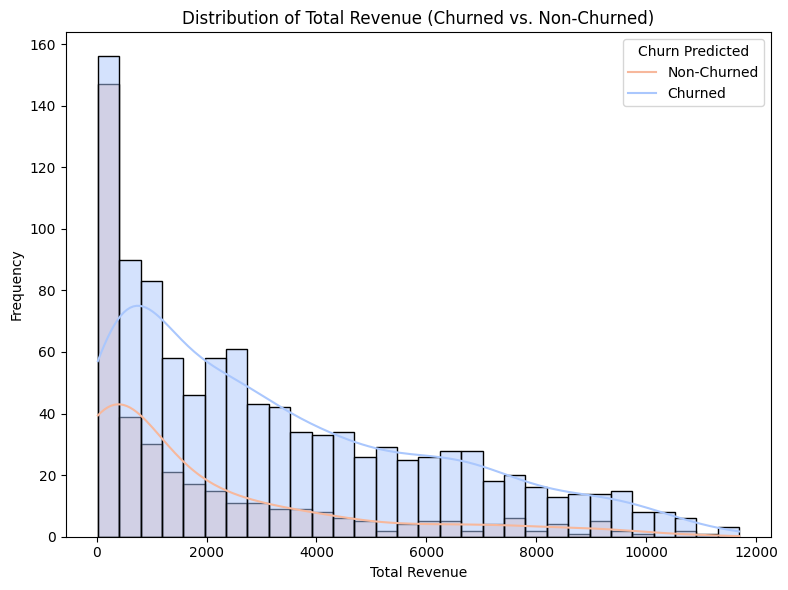

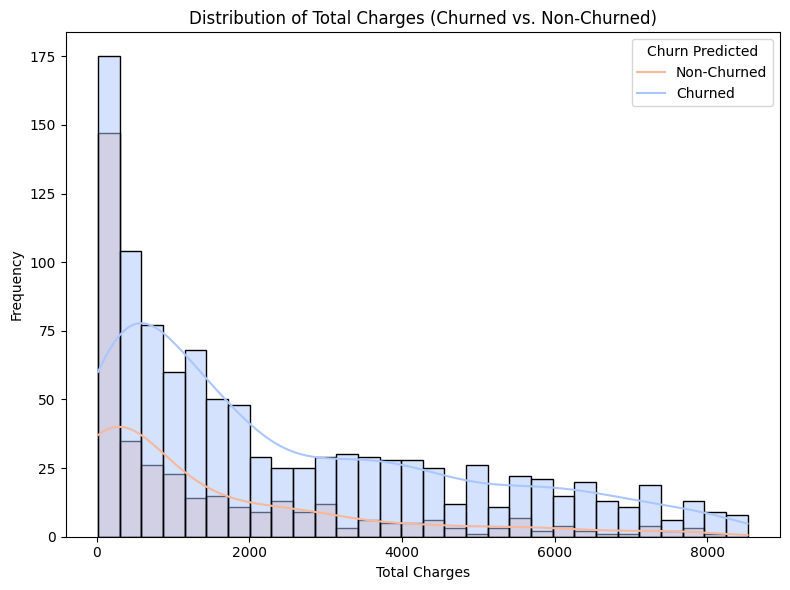

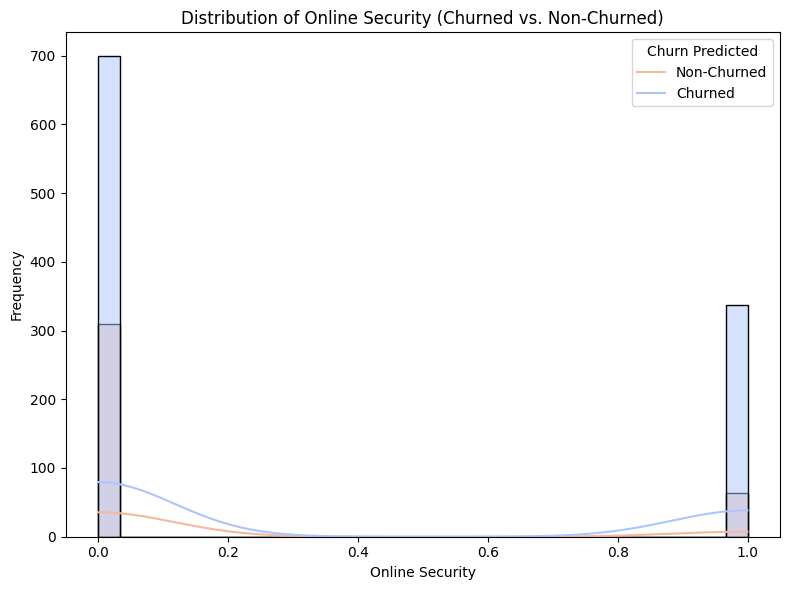

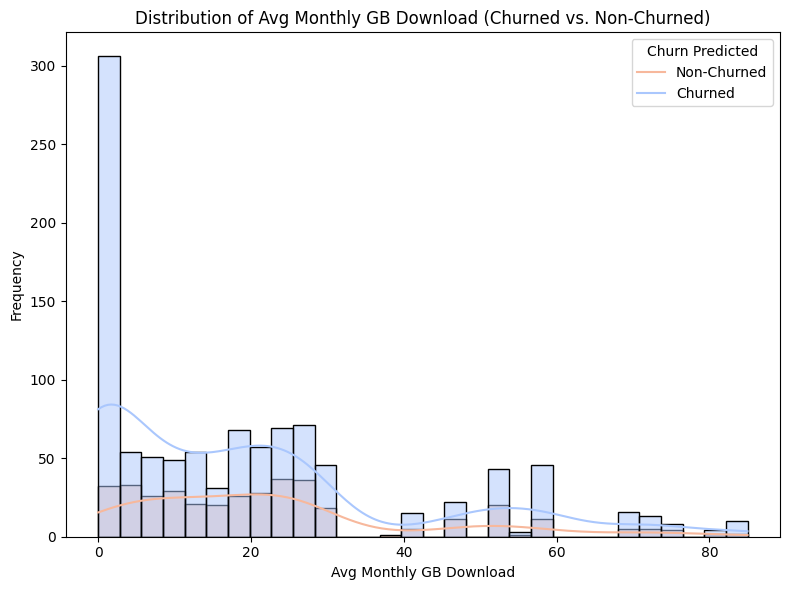

                Satisfaction Score Label                                     \
                                   count      mean       std  min  25%  50%   
Customer Status                                                               
0                                 1036.0  3.776062  0.788839  3.0  3.0  4.0   
1                                  373.0  1.769437  0.803506  1.0  1.0  2.0   

                          Total Revenue               ... Online Security  \
                 75%  max         count         mean  ...             75%   
Customer Status                                       ...                   
0                4.0  5.0        1036.0  3303.583234  ...             1.0   
1                2.0  3.0         373.0  1910.374316  ...             0.0   

                     Avg Monthly GB Download                                  \
                 max                   count       mean        std  min  25%   
Customer Status                                           

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predicted probabilities into binary predictions (churn = 1 if prob > 0.5, else 0)
churn_predictions = (y_pred_prob4 > 0.5).astype(int)

# Combine features and predictions into a single DataFrame
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Churn_Predicted'] = churn_predictions
X_test_with_predictions['Customer Status'] = y_test.values  # Assuming y_test is aligned

# Features to analyze
features_to_analyze = [
    'Satisfaction Score Label',
    'Total Revenue',
    'Total Charges',
    'Online Security',
    'Avg Monthly GB Download'
]

# Plot feature distributions for churned vs non-churned customers
for feature in features_to_analyze:
    plt.figure(figsize=(8, 6))

    # Distribution plot
    sns.histplot(
        data=X_test_with_predictions,
        x=feature,
        hue='Customer Status',  # Compare churned vs. non-churned customers
        kde=True,
        palette='coolwarm',
        bins=30
    )

    plt.title(f'Distribution of {feature} (Churned vs. Non-Churned)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Churn Predicted', labels=['Non-Churned', 'Churned'])
    plt.tight_layout()
    plt.show()

# Summary statistics for churned vs. non-churned customers
summary_stats = X_test_with_predictions.groupby('Customer Status')[features_to_analyze].describe()
print(summary_stats)


Column names in merged: Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Satisfaction Score Label',
       'Customer Status', 'CLTV'],
      dtype='object')


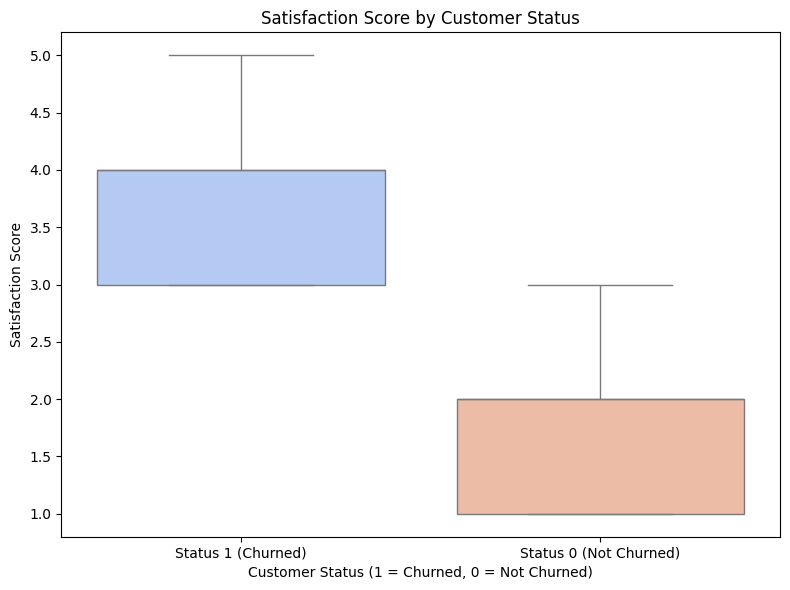

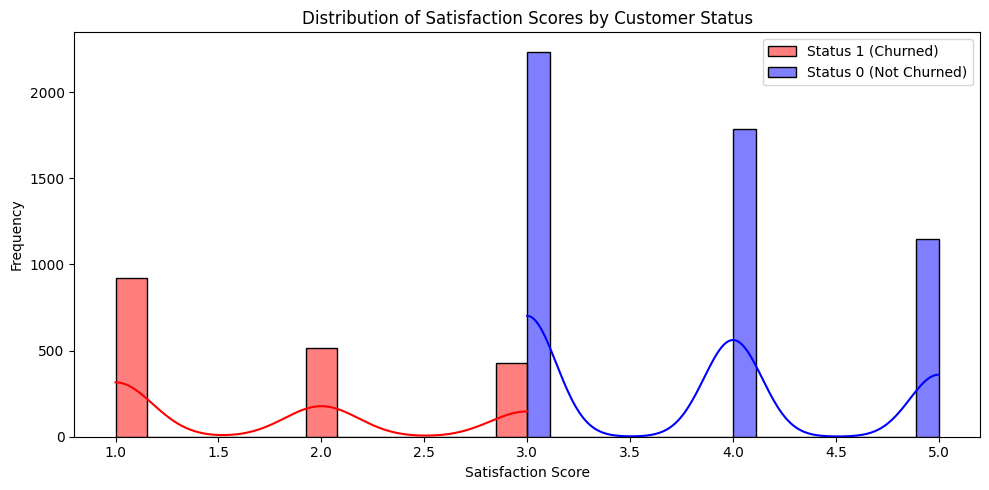

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check column names in the 'merged' DataFrame
print("Column names in merged:", merged.columns)

# Assuming 'Customer Status' is the correct column, check if it exists
if 'Customer Status' in merged.columns:
    # Filter the data by customer status
    status_1 = merged[merged['Customer Status'] == 1]  # Churned customers
    status_0 = merged[merged['Customer Status'] == 0]  # Non-churned customers

    # Combine data for visualization
    satisfaction_data = merged[merged['Customer Status'].isin([1, 0])]

    # Boxplot to compare satisfaction scores for status 1 and 0
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        data=satisfaction_data,
        x='Customer Status',
        y='Satisfaction Score',
        palette='coolwarm'
    )

    # Add titles and labels
    plt.title('Satisfaction Score by Customer Status')
    plt.xlabel('Customer Status (1 = Churned, 0 = Not Churned)')
    plt.ylabel('Satisfaction Score')
    plt.xticks([0, 1], ['Status 1 (Churned)', 'Status 0 (Not Churned)'])

    plt.tight_layout()
    plt.show()

    # Additional Visualization: Histograms
    plt.figure(figsize=(10, 5))
    sns.histplot(status_1['Satisfaction Score'], kde=True, color='red', label='Status 1 (Churned)')
    sns.histplot(status_0['Satisfaction Score'], kde=True, color='blue', label='Status 0 (Not Churned)')
    plt.title('Distribution of Satisfaction Scores by Customer Status')
    plt.xlabel('Satisfaction Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("'Customer Status' column not found in 'merged'. Please check your data.")


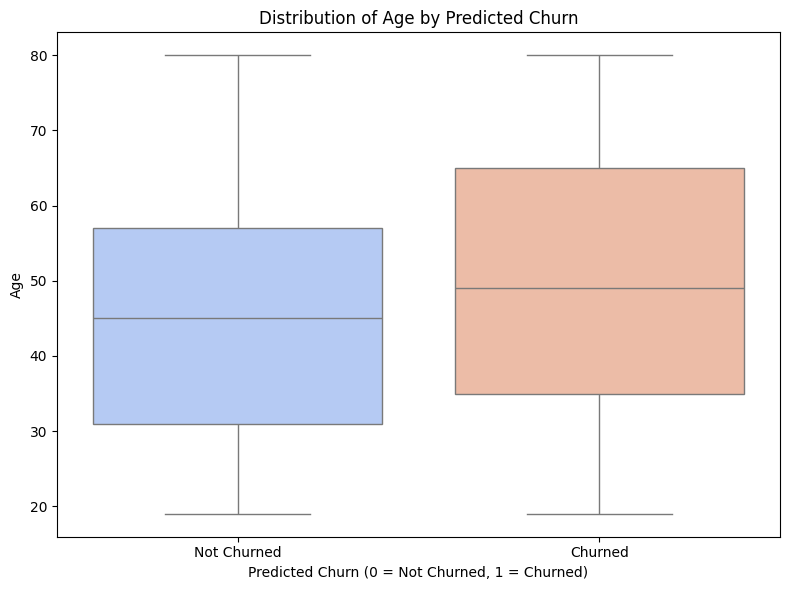

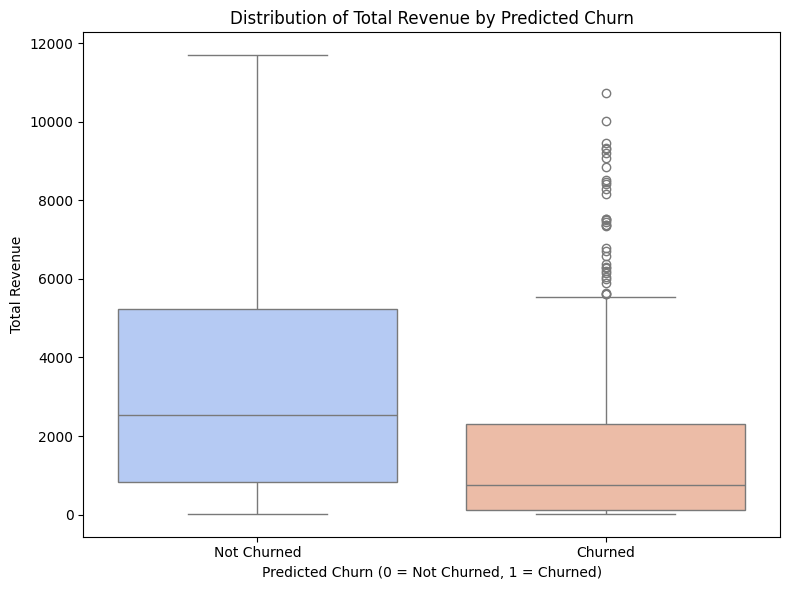

Age                                                      \
                  count       mean        std   min   25%   50%   75%   max   
Churn_Predicted                                                               
0                1081.0  45.121184  16.345322  19.0  31.0  45.0  57.0  80.0   
1                 328.0  49.594512  17.648719  19.0  35.0  49.0  65.0  80.0   

                Total Revenue                                             \
                        count         mean          std    min       25%   
Churn_Predicted                                                            
0                      1081.0  3290.374561  2857.255030  23.24  838.1000   
1                       328.0  1762.765091  2365.744006  24.96  119.2425   

                                               
                     50%        75%       max  
Churn_Predicted                                
0                2532.68  5237.2500  11688.90  
1                 745.09  2301.5875  10718.96

In [ ]:
#COMPARING AGE AND REVENUE FOR CHURNED VS. NON-CHURNED CUSTOMERS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred_prob4, X_test, and y_test are defined
# Create binary predictions: 1 if churn, 0 if not
churn_predictions = (y_pred_prob4 > 0.5).astype(int)

# Add predictions to the X_test DataFrame
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Churn_Predicted'] = churn_predictions

# Define the features to analyze
features_to_compare = ['Age', 'Total Revenue']  # Replace 'Age' and 'Total Revenue' with actual column names in X_test

# Plot boxplots for Age and Total Revenue grouped by predicted churn status
for feature in features_to_compare:
    plt.figure(figsize=(8, 6))

    # Boxplot
    sns.boxplot(
        data=X_test_with_predictions,
        x='Churn_Predicted',
        y=feature,
        palette='coolwarm'
    )

    # Title and labels
    plt.title(f'Distribution of {feature} by Predicted Churn')
    plt.xlabel('Predicted Churn (0 = Not Churned, 1 = Churned)')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Not Churned', 'Churned'])
    plt.tight_layout()
    plt.show()

# Summary statistics for Age and Revenue grouped by predicted churn status
summary_stats = X_test_with_predictions.groupby('Churn_Predicted')[['Age', 'Total Revenue']].describe()
summary_stats


In [ ]:
X.shape[0]

7043

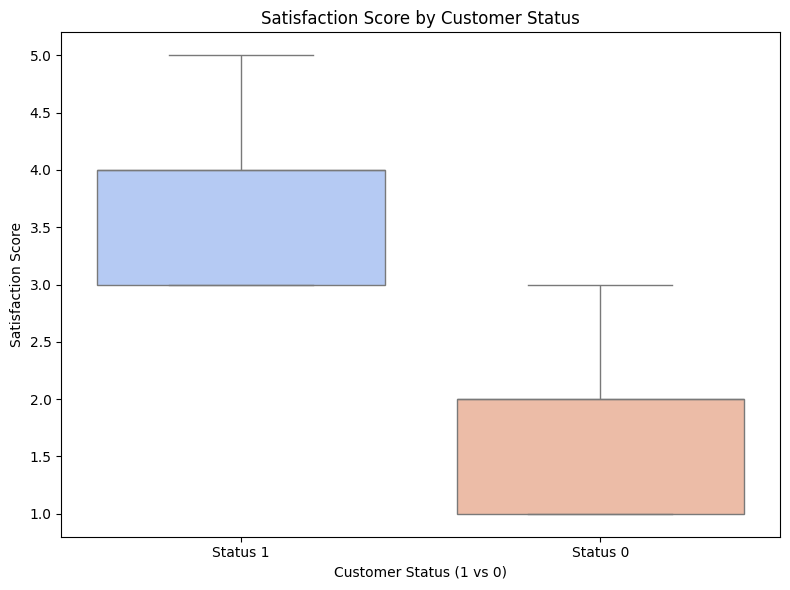

                  count      mean       std  min  25%  50%  75%  max
Customer Status                                                     
0                5174.0  3.789911  0.781162  3.0  3.0  4.0  4.0  5.0
1                1869.0  1.736223  0.808466  1.0  1.0  2.0  2.0  3.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test contains the data and has columns 'Customer Status' and 'Satisfaction Score'
# Filter the data by customer status
status_1 = merged[merged['Customer Status'] == 1]
status_0 = merged[merged['Customer Status'] == 0]

# Combine data for visualization
satisfaction_data = merged[merged['Customer Status'].isin([1, 0])]

# Boxplot to compare satisfaction scores for status 1 and 0
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=satisfaction_data,
    x='Customer Status',
    y='Satisfaction Score',
    palette='coolwarm'
)

# Add titles and labels
plt.title('Satisfaction Score by Customer Status')
plt.xlabel('Customer Status (1 vs 0)')
plt.ylabel('Satisfaction Score')
plt.xticks([0, 1], ['Status 1', 'Status 0'])

plt.tight_layout()
plt.show()

# Summary statistics for satisfaction scores
summary_stats = satisfaction_data.groupby('Customer Status')['Satisfaction Score'].describe()
print(summary_stats)


# Initial EDA

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

features = ['Age', 'Senior Citizen', 'Married', 'Tenure in Months', 'Monthly Charge', 'Total Charges',
            'Internet Service', 'Streaming TV', 'Streaming Movies', 'Referred a Friend', 'Contract', 'Gender', 'Dependents', 'Total Revenue', 'Paperless Billing']

df = pd.merge(demo_df, serv_df, on='Customer ID', how='inner')

df_selected = df[features]

df[features]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler


#1: feature processing and conversion to numeric values
df_selected = df.copy()

#convert categorical variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
df_selected['Senior Citizen'] = df_selected['Senior Citizen'].astype(int)
df_selected['Married'] = df_selected['Married'].astype(int)
df_selected['Internet Service'] = df_selected['Internet Service'].astype(int)
df_selected['Streaming TV'] = df_selected['Streaming TV'].astype(int)
df_selected['Streaming Movies'] = df_selected['Streaming Movies'].astype(int)
df_selected['Referred a Friend'] = df_selected['Referred a Friend'].astype(int)
df_selected['Paperless Billing'] = df_selected['Paperless Billing'].astype(int)
df_selected['Contract'] = label_encoder.fit_transform(df_selected['Contract'])

#handle missing values
numeric_features = ['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges']
df_selected[numeric_features] = df_selected[numeric_features].fillna(df_selected[numeric_features].mean())

#standardize the data
scaler = StandardScaler()
df_selected[numeric_features] = scaler.fit_transform(df_selected[numeric_features])

#apply kmeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Set the number of clusters to 2
df_selected['Cluster'] = kmeans.fit_predict(df_selected[numeric_features])

#5: individual plots to explore feature relationships

#original plots
sns.scatterplot(data=df_selected, x='Age', y='Senior Citizen', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Gender vs. Age (Senior Citizen)')
plt.xlabel('Age')
plt.ylabel('Senior Citizen')
plt.show()

sns.scatterplot(data=df_selected, x='Contract', y='Referred a Friend', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Contract vs. Referred a Friend')
plt.xlabel('Contract')
plt.ylabel('Referred a Friend')
plt.show()

sns.scatterplot(data=df_selected, x='Age', y='Monthly Charge', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Age vs. Monthly Charge')
plt.xlabel('Age')
plt.ylabel('Monthly Charge')
plt.show()

sns.scatterplot(data=df_selected, x='Tenure in Months', y='Monthly Charge', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Tenure vs. Monthly Charge')
plt.xlabel('Tenure in Months')
plt.ylabel('Monthly Charge')
plt.show()

sns.scatterplot(data=df_selected, x='Streaming TV', y='Monthly Charge', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Streaming TV vs. Monthly Charge')
plt.xlabel('Streaming TV')
plt.ylabel('Monthly Charge')
plt.show()

sns.scatterplot(data=df_selected, x='Streaming Movies', y='Monthly Charge', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Streaming Movies vs. Monthly Charge')
plt.xlabel('Streaming Movies')
plt.ylabel('Monthly Charge')
plt.show()

#new plots

sns.scatterplot(data=df_selected, x='Age', y='Senior Citizen', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Gender vs. Age')
plt.xlabel('Age')
plt.ylabel('Senior Citizen')
plt.show()

sns.scatterplot(data=df_selected, x='Age', y='Dependents', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Age vs. Dependents')
plt.xlabel('Age')
plt.ylabel('Dependents')
plt.show()
d
sns.scatterplot(data=df_selected, x='Senior Citizen', y='Married', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Gender vs. Married')
plt.xlabel('Senior Citizen')
plt.ylabel('Married')
plt.show()

sns.scatterplot(data=df_selected, x='Age', y='Total Charges', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Total Revenue vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Charges')
plt.show()

sns.scatterplot(data=df_selected, x='Age', y='Paperless Billing', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Age vs. Paperless Billing')
plt.xlabel('Age')
plt.ylabel('Paperless Billing')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#6: elbow method to determine the best number of clusters

#tange of cluster values to test
inertia_values = []
cluster_range = range(1, 11)  #yesting cluster sizes from 1 to 10

#fit kmeans for each number of clusters and calculate inertia (sum of squared distances)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected[numeric_features])
    inertia_values.append(kmeans.inertia_)

#scree plot (inertia vs. number of clusters)
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', color='b', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

#1: relevant features for clustering
df_selected = df[['Age', 'Senior Citizen', 'Married', 'Tenure in Months', 'Monthly Charge',
                  'Total Charges', 'Internet Service', 'Streaming TV', 'Streaming Movies',
                  'Referred a Friend', 'Contract']].copy()

#2: convert boolean columns to integers
df_selected['Senior Citizen'] = df_selected['Senior Citizen'].astype(int)
df_selected['Married'] = df_selected['Married'].astype(int)
df_selected['Internet Service'] = df_selected['Internet Service'].astype(int)
df_selected['Streaming TV'] = df_selected['Streaming TV'].astype(int)
df_selected['Streaming Movies'] = df_selected['Streaming Movies'].astype(int)
df_selected['Referred a Friend'] = df_selected['Referred a Friend'].astype(int)

#convert the 'Contract' column to numerical values using label encoding
label_encoder = LabelEncoder()
df_selected['Contract'] = label_encoder.fit_transform(df_selected['Contract'])

#3: handle missing values (fill with column means for simplicity)
numeric_features = df_selected.select_dtypes(include=[np.number]).columns
df_selected[numeric_features] = df_selected[numeric_features].fillna(df_selected[numeric_features].mean())

#4: apply kmeans clustering (with 2 clusters based on the elbow method)
kmeans = KMeans(n_clusters=2, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(df_selected[numeric_features])

#5: plot individual feature relationships with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Monthly Charge', hue='Cluster', data=df_selected, palette='viridis', marker='o', s=100, alpha=0.7)
plt.title('Cluster by Age vs Monthly Charge')
plt.xlabel('Age')
plt.ylabel('Monthly Charge')
plt.legend(title='Cluster', loc='best')
plt.show()

#gender vs age (based on senior citizen)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Senior Citizen', y='Age', hue='Cluster', data=df_selected, palette='viridis')
plt.title('Cluster by Senior Citizen vs Age')
plt.xlabel('Senior Citizen')
plt.ylabel('Age')
plt.show()

#contract type vs referred a friend
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Referred a Friend', data=df_selected, palette='viridis')
plt.title('Contract vs Referred a Friend')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Monthly Charge', y='Total Charges', hue='Cluster', data=df_selected, palette='viridis', marker='o', s=100, alpha=0.7)
plt.title('Cluster by Monthly Charge vs Total Charges')
plt.xlabel('Monthly Charge')
plt.ylabel('Total Charges')
plt.legend(title='Cluster', loc='best')
plt.show()

#scree plot to determine the optimal number of clusters (elbow method)
inertia_values = []
cluster_range = range(1, 11)  #testing cluster sizes from 1 to 10

#fit kmeans for each number of clusters and calculate inertia (sum of squared distances)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected[numeric_features])
    inertia_values.append(kmeans.inertia_)

#scree plot (inertia vs. number of clusters)
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', color='b', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

